In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
training_data = pd.read_csv("training.csv")
test_data = pd.read_csv("test.csv")

In [4]:
training_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [5]:
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
training_data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [7]:
training_data.duplicated().sum()

0

In [7]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg') 
plt.figure(figsize=(8, 6))
plt.boxplot(training_data["FraudResult"], vert=False, patch_artist=True, notch=True, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Boxplot')
plt.xlabel('Valeurs')
plt.show()

In [8]:
profile = ProfileReport(training_data, title="training_data_profiling_report", explorative=True)
profile.to_file("training_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Alex_Dagnogo\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'ChannelId_3'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
test_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45014,TransactionId_116198,BatchId_117348,AccountId_4841,SubscriptionId_3829,CustomerId_5225,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:56:28Z,2
45015,TransactionId_24829,BatchId_53630,AccountId_4803,SubscriptionId_1738,CustomerId_5272,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:57:38Z,1
45016,TransactionId_102920,BatchId_112209,AccountId_4817,SubscriptionId_4613,CustomerId_5286,UGX,256,ProviderId_3,ProductId_10,airtime,ChannelId_3,10000.0,10000,2019-03-14T23:59:17Z,1
45017,TransactionId_128439,BatchId_58734,AccountId_4841,SubscriptionId_3829,CustomerId_5286,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_3,-5000.0,5000,2019-03-14T23:59:39Z,2


In [9]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         45019 non-null  object 
 1   BatchId               45019 non-null  object 
 2   AccountId             45019 non-null  object 
 3   SubscriptionId        45019 non-null  object 
 4   CustomerId            45019 non-null  object 
 5   CurrencyCode          45019 non-null  object 
 6   CountryCode           45019 non-null  int64  
 7   ProviderId            45019 non-null  object 
 8   ProductId             45019 non-null  object 
 9   ProductCategory       45019 non-null  object 
 10  ChannelId             45019 non-null  object 
 11  Amount                45019 non-null  float64
 12  Value                 45019 non-null  int64  
 13  TransactionStartTime  45019 non-null  object 
 14  PricingStrategy       45019 non-null  int64  
dtypes: float64(1), int6

,CountryCode,Amount,Value,PricingStrategy
count,45019.0,4.501900e+04,4.501900e+04,45019.000000
mean,256.0,4.632681e+03,1.030034e+04,2.260646
std,0.0,9.613215e+04,9.571010e+04,0.739666
min,256.0,-2.500000e+06,2.000000e+00,0.000000
25%,256.0,-5.000000e+01,5.000000e+02,2.000000
50%,256.0,1.000000e+03,1.200000e+03,2.000000
75%,256.0,5.000000e+03,5.200000e+03,2.000000
max,256.0,9.500000e+06,9.500000e+06,4.000000


In [10]:
test_data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [11]:
test_data.duplicated().sum()

0

In [24]:
profile = ProfileReport(test_data, title="test_data_profiling_report", explorative=True)
profile.to_file("test_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Définir le style pour les graphiques
sns.set(style="whitegrid")

c:\Users\Alex_Dagnogo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


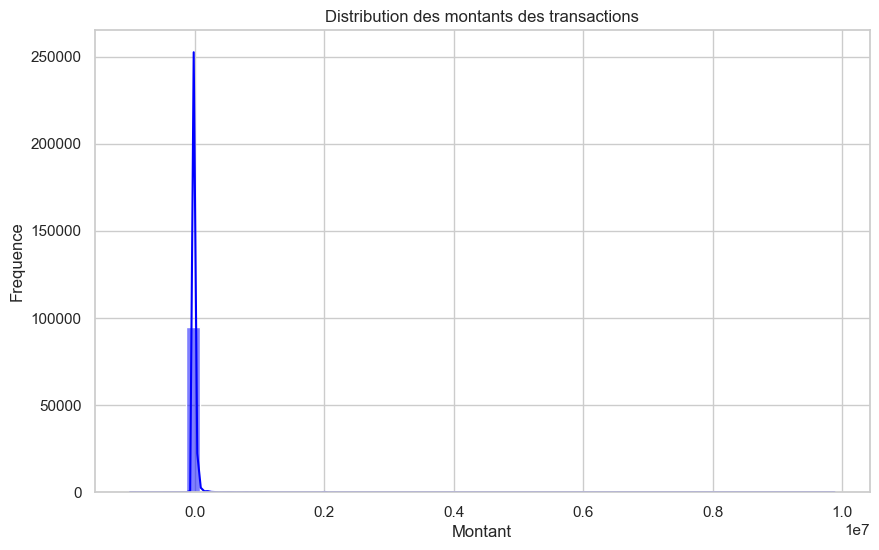

In [13]:
# Distribution des montants des transactions
plt.figure(figsize=(10, 6))
sns.histplot(training_data['Amount'], kde=True, bins=50, color='blue')
plt.title('Distribution des montants des transactions')
plt.xlabel('Montant')
plt.ylabel('Frequence')
plt.show()

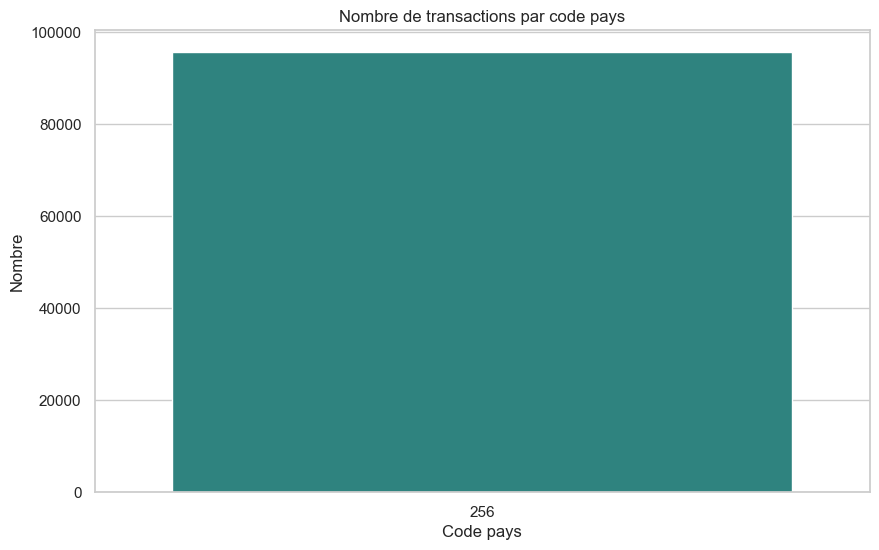

In [14]:
# Nombre de transactions par code pays
plt.figure(figsize=(10, 6))
sns.countplot(x='CountryCode', data=training_data, palette='viridis')
plt.title('Nombre de transactions par code pays')
plt.xlabel('Code pays')
plt.ylabel('Nombre')
plt.show()

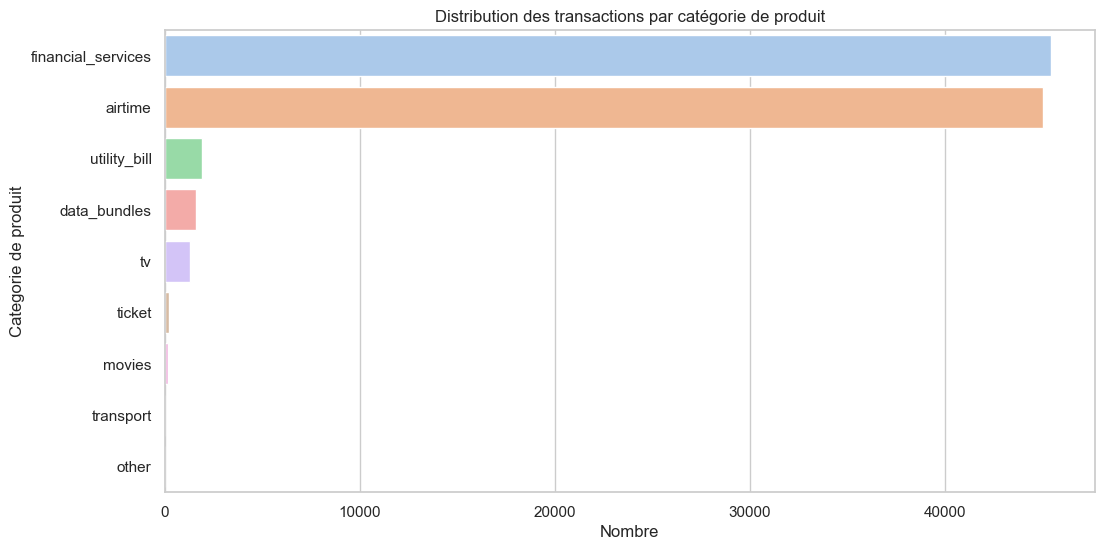

In [15]:
# Distribution des transactions par catégorie de produit
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=training_data, palette='pastel', order=training_data['ProductCategory'].value_counts().index)
plt.title('Distribution des transactions par catégorie de produit')
plt.xlabel('Nombre')
plt.ylabel('Categorie de produit')
plt.show()

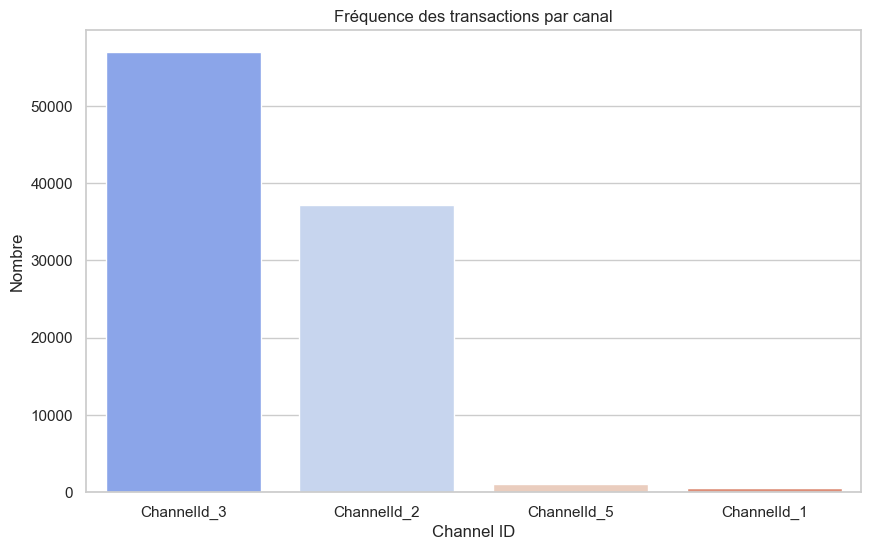

In [16]:
# Fréquence des transactions par canal
plt.figure(figsize=(10, 6))
sns.countplot(x='ChannelId', data=training_data, palette='coolwarm', order=training_data['ChannelId'].value_counts().index)
plt.title('Fréquence des transactions par canal')
plt.xlabel('Channel ID')
plt.ylabel('Nombre')
plt.show()

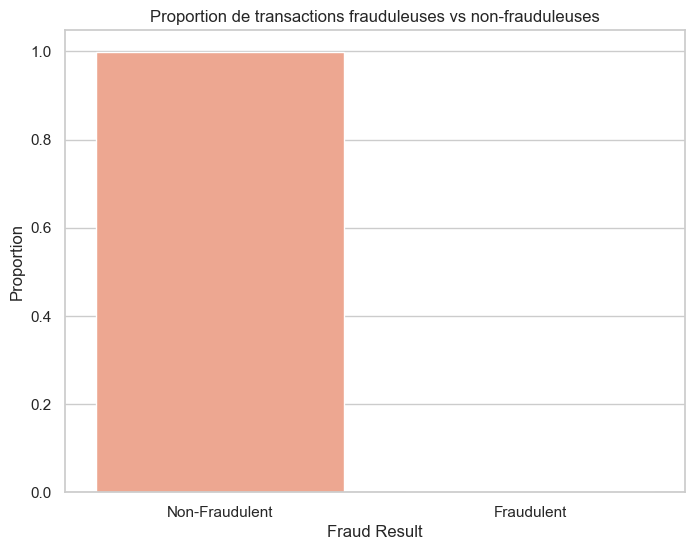

In [17]:
# Proportion de transactions frauduleuses vs non-frauduleuses
plt.figure(figsize=(8, 6))
fraud_proportion = training_data['FraudResult'].value_counts(normalize=True)
sns.barplot(x=fraud_proportion.index, y=fraud_proportion, palette='Reds')
plt.title('Proportion de transactions frauduleuses vs non-frauduleuses')
plt.xlabel('Fraud Result')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [18]:
# Définir les colonnes catégorielles sans `TransactionStartTime`
categorical_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
                       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 
                       'ChannelId']

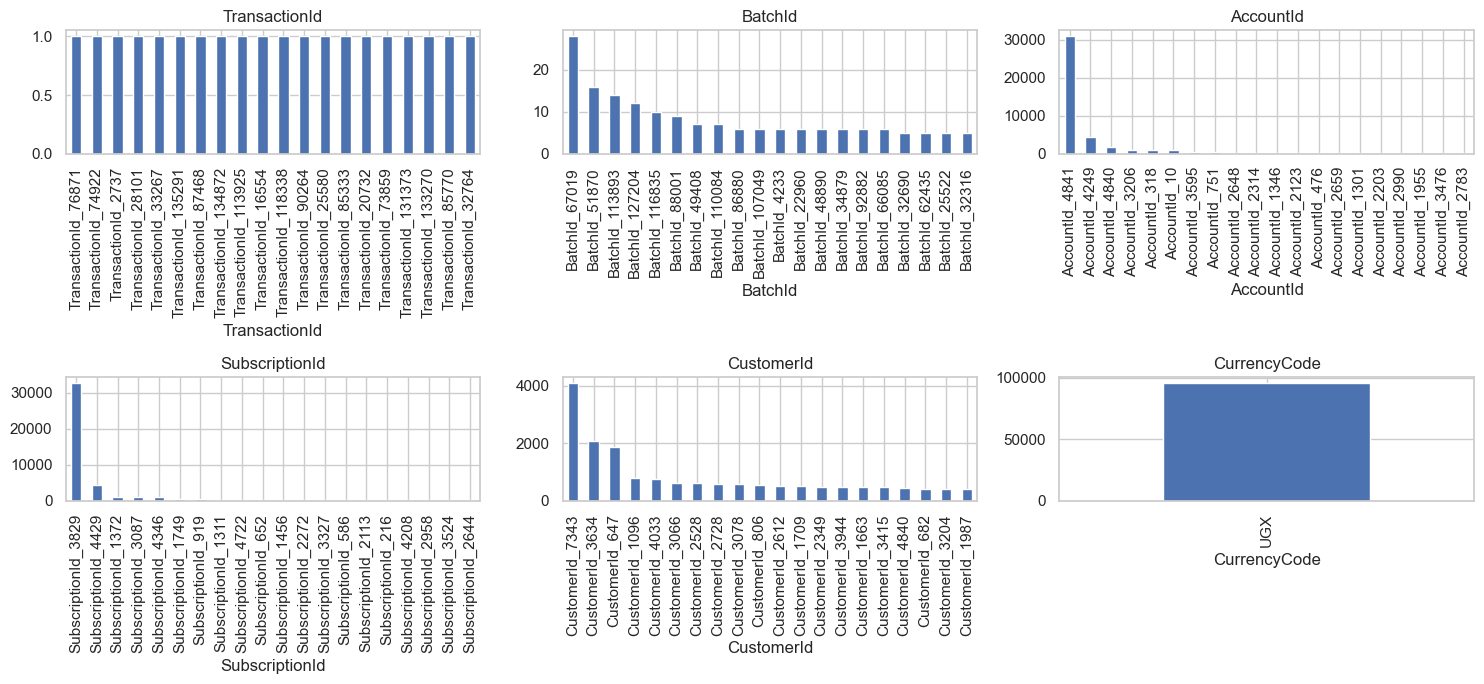

In [19]:
# Sélectionner un sous-ensemble de colonnes catégorielles à afficher
subset_columns = categorical_columns[:6]

plt.figure(figsize=(15, 7))
for i, column in enumerate(subset_columns, 1):
    plt.subplot(2, 3, i)
    training_data[column].value_counts().nlargest(20).plot(kind='bar')
    plt.title(column)
plt.tight_layout()
plt.show()

In [20]:
# Appliquer l'encodage de label sur les colonnes catégorielles et créer des dictionnaires de mappage
label_encoders = {}
mapping_dict = {}
for column in categorical_columns:
    le = LabelEncoder()
    training_data[column] = le.fit_transform(training_data[column])
    mapping_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    # Transformer le jeu de données de test en utilisant les classes connues
    test_data[column] = test_data[column].map(mapping_dict[column]).fillna(-1).astype(int)
    label_encoders[column] = le

In [21]:
# Traitement de la colonne TransactionStartTime
for data in [training_data, test_data]:
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
    data['Year'] = data['TransactionStartTime'].dt.year
    data['Month'] = data['TransactionStartTime'].dt.month
    data['Day'] = data['TransactionStartTime'].dt.day
    data['Hour'] = data['TransactionStartTime'].dt.hour
    data['Minute'] = data['TransactionStartTime'].dt.minute
    data['Second'] = data['TransactionStartTime'].dt.second
    data.drop(columns=['TransactionStartTime'], inplace=True)

In [22]:
# Sauvegarder les dictionnaires de mappage pour une utilisation ultérieure avec pickle
with open('label_encoders_mapping1.pkl', 'wb') as f:
    pickle.dump(mapping_dict, f)

c:\Users\Alex_Dagnogo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


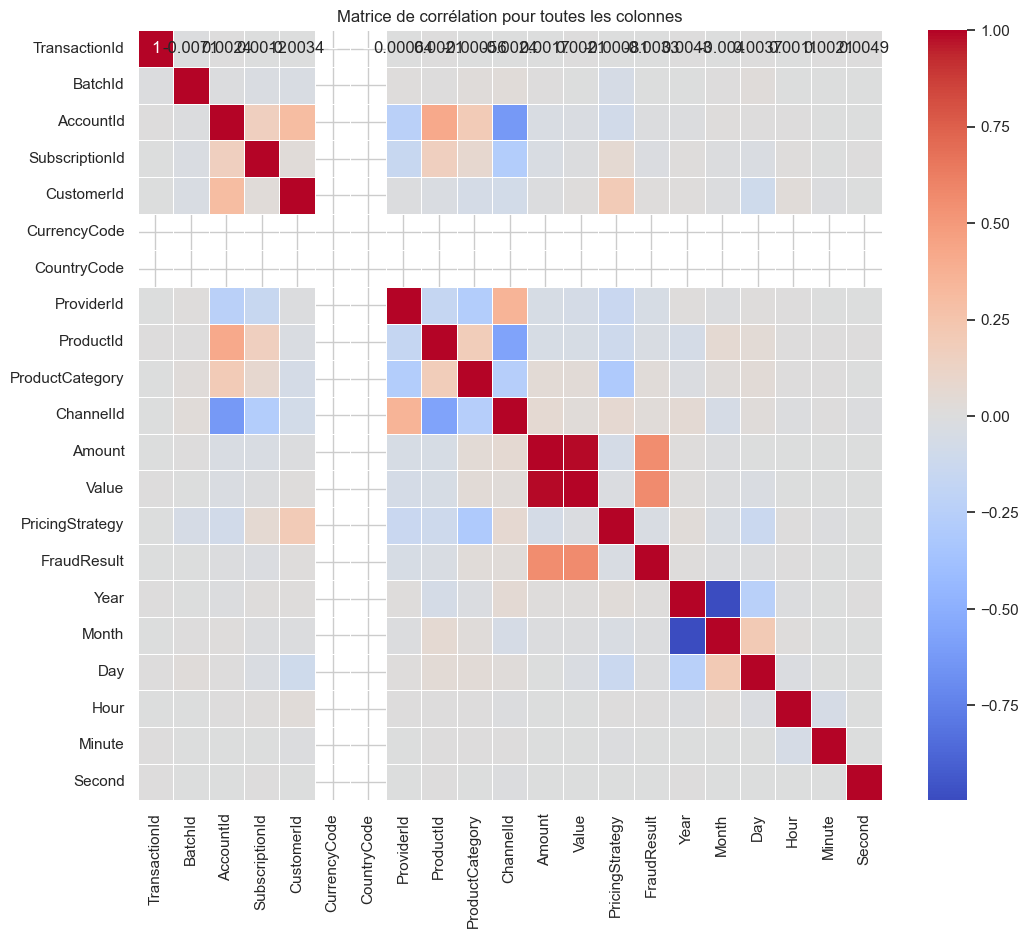

In [23]:
# Matrice de corrélation
corr_matrix = training_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation pour toutes les colonnes')
plt.show()

In [24]:
# Séparer les caractéristiques et l'étiquette dans les données d'entraînement
X_train = training_data.drop(columns=['FraudResult'])
y_train = training_data['FraudResult']

# Les données de test n'ont pas l'étiquette 'FraudResult'
X_test = test_data

In [25]:
from sklearn.preprocessing import StandardScaler

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les données normalisées en DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Appliquer SMOTE pour suréchantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Entraîner le modèle
model = RandomForestClassifier(random_state=42, max_depth=10)
model.fit(X_train_resampled, y_train_resampled)

# Prédictions sur les données de test
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle
print("Model Evaluation:")
print(classification_report(y_train, model.predict(X_train_scaled)))

In [36]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Appliquer SMOTE pour suréchantillonner la classe minoritaire
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train_scaled, y_train)

# Entraîner le modèle
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Prédictions sur les données de test
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle
print("Model Evaluation:")
print(classification_report(y_train, model.predict(X_train_scaled)))

Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     95469
           1       0.73      0.98      0.84       193

    accuracy                           1.00     95662
   macro avg       0.87      0.99      0.92     95662
weighted avg       1.00      1.00      1.00     95662



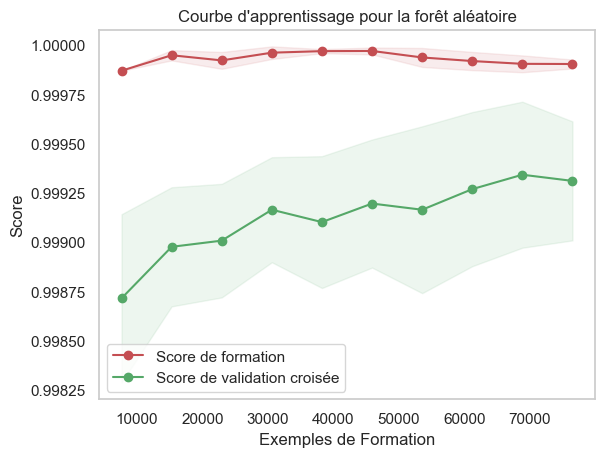

In [37]:
# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(estimator, X, y, title="Courbe d'apprentissage"):
    plt.figure()
    plt.title(title)
    plt.xlabel("Exemples de Formation")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de formation")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")
    
    plt.legend(loc="best")
    return plt

# Tracer les courbes d'apprentissage pour la régression logistique
plot_learning_curve(model, X_train_scaled, y_train, title="Courbe d'apprentissage pour la forêt aléatoire")
plt.show()


In [38]:
# Matrice de confusion sur les données d'entrainements
matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
matrix_train

Confusion Matrix:


array([[95399,    70],
       [    3,   190]], dtype=int64)

In [39]:
# ROC AUC
roc_auc = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9998991073086309


In [43]:
# Sauvegarder le modèle et le scaler avec pickle
with open('fraud_detection_model1.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)